<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Soft_Computing/blob/main/Differential_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MD ABDULLAH AL MAMUN MOJUMDER

SAU/CS(M)/2023/03

**Differential Evolution (DE):**

Differential Evolution (DE) is a population-based, stochastic optimization algorithm within the soft computing paradigm, primarily used for solving complex, non-linear, and multi-dimensional optimization problems. Introduced by Storn and Price in 1995, DE is particularly effective for continuous optimization tasks and is widely applied in engineering, machine learning, and data science due to its simplicity, robustness, and efficiency.

#How Differential Evolution works
# Initialization

-> Randomly generate a population of candidate solution(vectors).

-> Each solution has dimension = number of variables.

Pop = [x1, x2, ..., xn]  where xi = [x1_i, x2_i, ..., xd_i]

# Mutation

-> For each solution
𝑥
𝑖
, create a mutant vector:

𝑣
𝑖
=
𝑥
𝑟
1
+
𝐹
⋅
(
𝑥
𝑟
2
−
𝑥
𝑟
3
)

-> r1,r2,r3: random distinct indices from the population

-> F: mutation factor (e.g., 0.5 to 1)

# Crossover
-> Mix the mutant vector
𝑣
𝑖
with the original
𝑥
𝑖
to produce a trial vector
𝑢
𝑖
:

𝑢
𝑖
,
𝑗
=
{
𝑣
𝑖
,
𝑗
,
if rand
≤
𝐶
𝑅
 or
𝑗
-
𝑗
𝑟
𝑎
𝑛
𝑑

𝑥
𝑖
,
𝑗
,
otherwise

-> CR: crossover probability

# Selection

Choose the better between
𝑢
𝑖
 and
𝑥
𝑖
:

if f(u_i) < f(x_i):

    x_i = u_i

# Repeat

-> Loop through generations until a stopping criterion is met (max gen, error threshold)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Objective function: Sphere function (objective function to minimize)
def sphere_func(x):
    return np.sum(np.square(x))


In [ ]:
# Differential Evolution parameters
pop_size = 5
num_vars = 2
lb, ub = -5, 5
num_generations = 50
F = 0.4  # Differential weight
CR = 0.8  # Crossover probability

In [ ]:
# Initialize population
population = lb + (ub - lb) * np.random.rand(pop_size, num_vars)
trial_population = np.zeros((pop_size, num_vars))

# Evaluate initial population
fitness = np.array([sphere_func(ind) for ind in population])
fitness_history = []  # For storing best fitness per generation

In [ ]:
# Main DE loop
for gen in range(num_generations):
    # Mutation and Crossover
    for i in range(pop_size):
        indices = [idx for idx in range(pop_size) if idx != i]
        a_idx, b_idx, c_idx = np.random.choice(indices, 3, replace=False)
        a, b, c = population[a_idx], population[b_idx], population[c_idx]
        mutant_vector = a + F * (b - c)

        # Clip to ensure within bounds
        mutant_vector = np.clip(mutant_vector, lb, ub)

        # Crossover
        j_rand = np.random.randint(num_vars)
        trial = np.array([mutant_vector[j] if (np.random.rand() <= CR or j == j_rand) else population[i, j] for j in range(num_vars)])
        trial_population[i] = trial

    # Selection
    for i in range(pop_size):
        trial_fitness = sphere_func(trial_population[i])
        if trial_fitness < fitness[i]:
            population[i] = trial_population[i]
            fitness[i] = trial_fitness

    # Store current best fitness for convergence plot
    best_fitness = np.min(fitness)
     # Round to avoid float precision issues causing false 0.000000 output
    best_fitness_rounded = round(best_fitness, 8)
    fitness_history.append( best_fitness_rounded)
    print(f"Generation {gen + 1}: Best fitness = {best_fitness_rounded:.6f}")

Generation 1: Best fitness = 3.662412
Generation 2: Best fitness = 1.070013
Generation 3: Best fitness = 1.070013
Generation 4: Best fitness = 1.070013
Generation 5: Best fitness = 1.070013
Generation 6: Best fitness = 1.070013
Generation 7: Best fitness = 0.704257
Generation 8: Best fitness = 0.704257
Generation 9: Best fitness = 0.627153
Generation 10: Best fitness = 0.627153
Generation 11: Best fitness = 0.619577
Generation 12: Best fitness = 0.490171
Generation 13: Best fitness = 0.465004
Generation 14: Best fitness = 0.420274
Generation 15: Best fitness = 0.420274
Generation 16: Best fitness = 0.420274
Generation 17: Best fitness = 0.420274
Generation 18: Best fitness = 0.416377
Generation 19: Best fitness = 0.416377
Generation 20: Best fitness = 0.414780
Generation 21: Best fitness = 0.414780
Generation 22: Best fitness = 0.414137
Generation 23: Best fitness = 0.413808
Generation 24: Best fitness = 0.413470
Generation 25: Best fitness = 0.413217
Generation 26: Best fitness = 0.41

In [ ]:
# Final evaluation
best_index = np.argmin(fitness)
best_solution = population[best_index]
print(f"\nFinal Best fitness: {best_fitness:.7f}")
print("Best Solution:", best_solution)


Final Best fitness: 0.4131817
Best Solution: [ 0.64142874 -0.04184344]


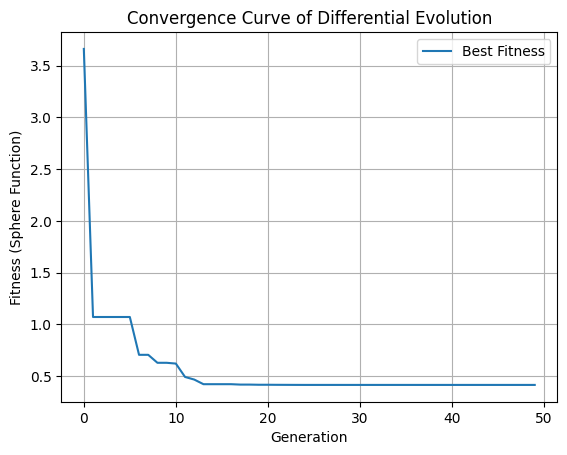

In [ ]:
# Plot convergence curve for evaluation
plt.plot(fitness_history, label='Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness (Sphere Function)')
plt.title('Convergence Curve of Differential Evolution')
plt.legend()
plt.grid(True)
plt.show()